In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import linear_model

In [4]:
df = pd.read_csv("Housing.csv")
df

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished
...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,1820000,3000,2,1,1,yes,no,yes,no,no,2,no,unfurnished
541,1767150,2400,3,1,1,no,no,no,no,no,0,no,semi-furnished
542,1750000,3620,2,1,1,yes,no,no,no,no,0,no,unfurnished
543,1750000,2910,3,1,1,no,no,no,no,no,0,no,furnished


In [8]:
df = df.drop(['furnishingstatus', 'parking', 'airconditioning', 'hotwaterheating', 'basement', 'guestroom', 'mainroad', 'prefarea'], axis=1)

df

,price,area,bedrooms,bathrooms,stories
0,13300000,7420,4,2,3
1,12250000,8960,4,4,4
2,12250000,9960,3,2,2
3,12215000,7500,4,2,2
4,11410000,7420,4,1,2
...,...,...,...,...,...
540,1820000,3000,2,1,1
541,1767150,2400,3,1,1
542,1750000,3620,2,1,1
543,1750000,2910,3,1,1


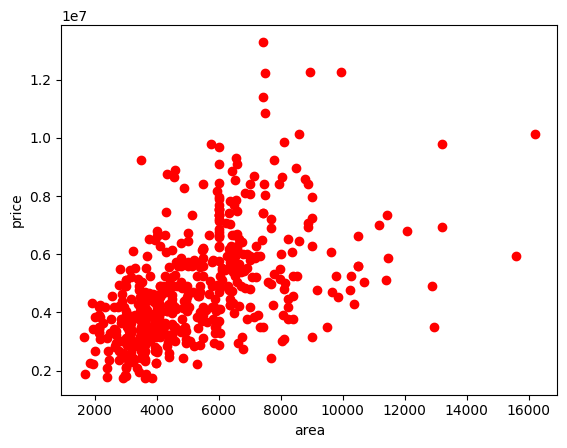

In [41]:
%matplotlib inline
plt.xlabel('area')
plt.ylabel('price')
plt.scatter(df.area, df.price, color = 'red')

In [13]:
median_bed = df.bedrooms.median()
median_bed

3.0

In [14]:
df.bedrooms.fillna(median_bed)

0      4
1      4
2      3
3      4
4      4
      ..
540    2
541    3
542    2
543    3
544    3
Name: bedrooms, Length: 545, dtype: int64

In [15]:
median_bath = df.bathrooms.median()
median_bath

1.0

In [16]:
df.bedrooms.fillna(median_bath)

0      4
1      4
2      3
3      4
4      4
      ..
540    2
541    3
542    2
543    3
544    3
Name: bedrooms, Length: 545, dtype: int64

In [17]:
median_sto = df.stories.median()
median_sto

2.0

In [18]:
df.bedrooms.fillna(median_sto)

0      4
1      4
2      3
3      4
4      4
      ..
540    2
541    3
542    2
543    3
544    3
Name: bedrooms, Length: 545, dtype: int64

In [19]:
df

,price,area,bedrooms,bathrooms,stories
0,13300000,7420,4,2,3
1,12250000,8960,4,4,4
2,12250000,9960,3,2,2
3,12215000,7500,4,2,2
4,11410000,7420,4,1,2
...,...,...,...,...,...
540,1820000,3000,2,1,1
541,1767150,2400,3,1,1
542,1750000,3620,2,1,1
543,1750000,2910,3,1,1


In [20]:
reg = linear_model.LinearRegression()
reg.fit(df[['area', 'bedrooms', 'bathrooms', 'stories']], df.price)

LinearRegression()

In [21]:
reg.coef_

array([3.80024429e+02, 1.98295494e+05, 1.20018047e+06, 5.31595009e+05])

In [23]:
reg.intercept_

-282091.2903634589

In [37]:
features = pd.DataFrame([[10000, 3, 3, 2]], columns=['area', 'bedrooms', 'bathrooms', 'stories'])
prediction = reg.predict(features)
print(prediction)

[8776770.92270494]
